<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Mathias González Espinoza.
- Nombre de alumno 2: Eduardo Javier Silva Gaete.


### **Link de repositorio de GitHub:** [https://github.com/Zerzer0/MDS7202](https://github.com/Zerzer0/MDS7202)

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [3]:
for col in df.columns:
    print(f"{col}:")
    print(df[col].unique())
    print("\n")

Age:
[ 4. 12. 13. 11.  8.  1.  6.  3.  7. 10.  9.  5.  2.]


Sex:
[1. 0.]


HighChol:
[0. 1.]


CholCheck:
[1. 0.]


BMI:
[26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78. 74.]


Smoker:
[0. 1.]


HeartDiseaseorAttack:
[0. 1.]


PhysActivity:
[1. 0.]


Fruits:
[0. 1.]


Veggies:
[1. 0.]


HvyAlcoholConsump:
[0. 1.]


GenHlth:
[3. 1. 2. 4. 5.]


MentHlth:
[ 5.  0.  7.  3.  4.  2. 30. 20.  1. 15. 10. 25. 14. 28.  6. 29. 26. 12.
 16. 22. 13.  8.  9. 21. 18. 17. 27. 24. 23. 11. 19.]


PhysHlth:
[30.  0. 10.  3.  6.  4. 15.  1.  2. 14.  7. 25. 21. 20.  5.  8. 22. 23.
 29. 12. 18. 28. 26. 24. 27. 11. 13. 16. 17.  9. 19.]


DiffWalk:
[0. 1.]


Stroke:
[0. 1.]


HighBP:
[1. 0.]


Diabetes:
[0. 1.]




In [4]:
df.corr()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
Age,1.000000,-0.002315,0.240338,0.101743,-0.038648,0.105424,0.221878,-0.100753,0.061096,-0.018893,-0.057705,0.155624,-0.101746,0.084852,0.195265,0.123879,0.338132,0.278738
Sex,-0.002315,1.000000,0.017324,-0.007991,0.000827,0.112125,0.098161,0.051753,-0.088723,-0.052604,0.014164,-0.014555,-0.089204,-0.045957,-0.082248,0.003822,0.040819,0.044413
HighChol,0.240338,0.017324,1.000000,0.085981,0.131309,0.093398,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.237778,0.083881,0.142610,0.162043,0.099786,0.316515,0.289213
CholCheck,0.101743,-0.007991,0.085981,1.000000,0.045648,-0.004331,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.059213,-0.010660,0.034540,0.044430,0.022529,0.103283,0.115382
BMI,-0.038648,0.000827,0.131309,0.045648,1.000000,0.011551,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,0.267888,0.104682,0.161862,0.246094,0.022931,0.241019,0.293373
Smoker,0.105424,0.112125,0.093398,-0.004331,0.011551,1.000000,0.124418,-0.079823,-0.074811,-0.029926,0.077835,0.152416,0.091257,0.120698,0.119789,0.064658,0.087438,0.085999
HeartDiseaseorAttack,0.221878,0.098161,0.181187,0.043497,0.060355,0.124418,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.275868,0.075057,0.198416,0.232611,0.223394,0.210750,0.211523
PhysActivity,-0.100753,0.051753,-0.090453,-0.008249,-0.170936,-0.079823,-0.098223,1.000000,0.133813,0.149322,0.019111,-0.273548,-0.130090,-0.234500,-0.276868,-0.079985,-0.136102,-0.158666
Fruits,0.061096,-0.088723,-0.047384,0.017384,-0.084505,-0.074811,-0.019436,0.133813,1.000000,0.238605,-0.033246,-0.098687,-0.062102,-0.048572,-0.050784,-0.008996,-0.040852,-0.054077
Veggies,-0.018893,-0.052604,-0.042836,0.000349,-0.056528,-0.029926,-0.036315,0.149322,0.238605,1.000000,0.022090,-0.115795,-0.052359,-0.066896,-0.084072,-0.047601,-0.066624,-0.079293


## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?. 

In [5]:
!pip install xgboost


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error

# Transformamos las columnas numéricas binarias o que definen una categoria a variables categóricas
columnas_a_categoricas = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 
                        'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']
df[columnas_a_categoricas].astype('category')

# Se divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop('Diabetes', axis=1), df['Diabetes'], test_size=0.2, random_state=42, shuffle=True, stratify=df['Diabetes'])

# Definir las columnas numéricas y categóricas
columnas_categoricas = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 
                        'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Stroke', 'HighBP']
columnas_numericas = ['Age', 'BMI', 'MentHlth', 'PhysHlth']

# Construir el preprocesamiento de datos
preprocessor = ColumnTransformer(
    transformers=[
        ('StandarScaler', StandardScaler(), columnas_numericas),    # Estandarizar los datos numéricos
        ('OneHotEncoder', OneHotEncoder(sparse_output=False), columnas_categoricas)     # Onehotencoder para los datos categóricos
    ])

# Transformar el output en formato pandas
preprocessor.set_output(transform="pandas")

# Construir el pipeline con el preprocesamiento y el modelo XGBoost
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

# Entrenar el modelo, hacer predicciones y evaluar el modelo
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir resultados
print(f'MAE: {mae}\n')
print(f'Accuracy: {accuracy}\n')
print('Classification Report:')
print(classification_rep)

MAE: 0.2567366857627838

Accuracy: 0.7432633142372163

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      7070
         1.0       0.72      0.78      0.75      7069

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



**Respuesta:** Del *Classification Report* podemos ver que se obtuvo un 74% de precisión general, un recall de 70% para no diabete (0) y 78% para si diabetes (1), finalmente se presenta un f1-score de 73% para la clase 0, y un 75% para la clase 1. Estas métricas nos permiten identificar que tanta precisión tiene nuestro modelo al momento de clasificar, que tantos valores positivos como negativos fueron clasificados efectivamente como positivos o negativos, y finalmente un promedio entre el recall y precission. Nos esfocaremos más en la métrica Recall puesto que es importante clasificar de forma correcta cuando se presenta diabetes o no, y observando los resultados, se tiene un valor bajo para los estándares de poder predecir de forma correcta si se presenta diabete o no. Estas métricas nos permiten evaluar de forma correcta una correcta elección de las features, y así, obtener un mejor desempeño del modelo.

## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

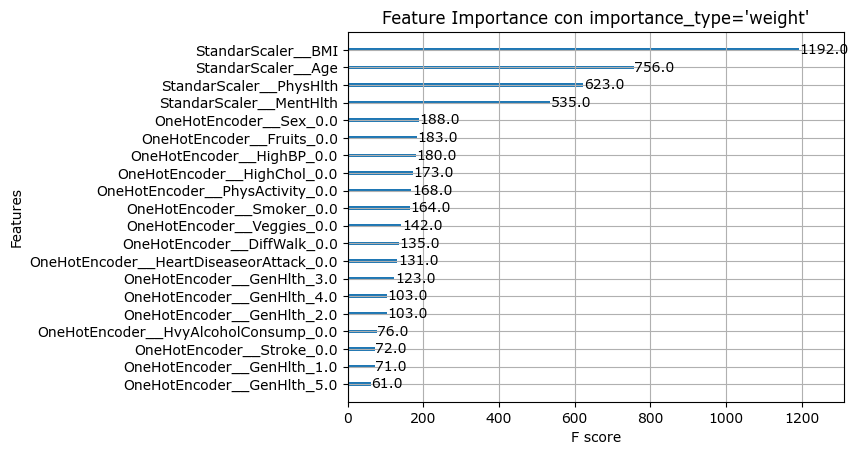

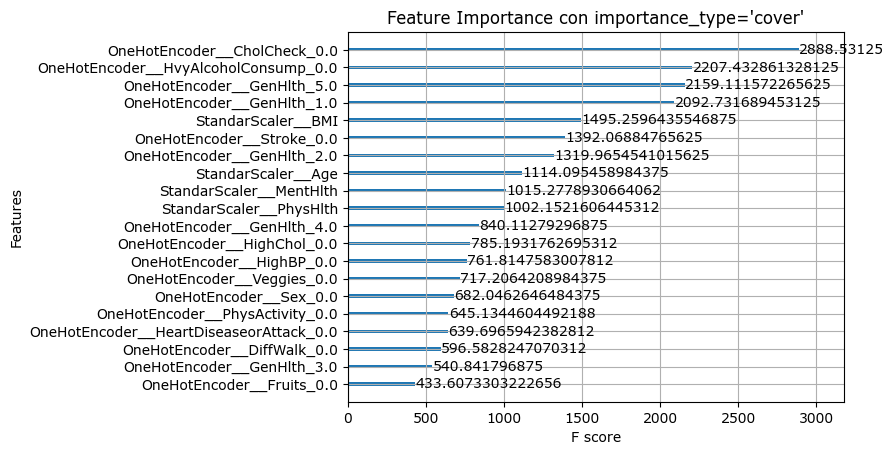

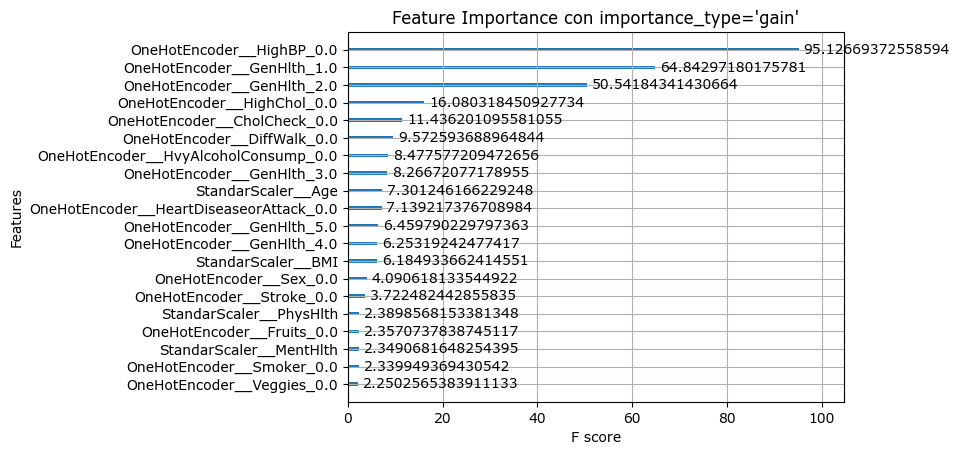

In [7]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(pipeline.named_steps['classifier'], max_num_features=20, importance_type='weight', title="Feature Importance con importance_type='weight'")
plt.show()

plot_importance(pipeline.named_steps['classifier'], max_num_features=20, importance_type='cover', title="Feature Importance con importance_type='cover'")
plt.show()

plot_importance(pipeline.named_steps['classifier'], max_num_features=20, importance_type='gain', title="Feature Importance con importance_type='gain'")
plt.show()

**Respuesta:** De lo anterior podemos ver que los métodos no son del todo compatibles entre si, puesto que para el caso del tipo de importancia 'weight' se tienen como principales características *BMI*, *Age*, *PhysHlth*, y *MentHlth*, mientras que para el tipo de importancia 'cover' se tienen a *Cholcheck*, *BMI*, y *GenHlth*, y para tipo de importancia 'gain' se tienen a *HighBP* y *GenHlth*. Esta desigualdad se debe a que, por ejemplo, una feature puede tener un alto weight porque se utiliza con frecuencia, pero su contribución real a la mejora del modelo puede ser baja. 

Si bien este método proporciona información valiosa sobre la importancia de las diferentes features, presenta debilidades importantes, como la de no brindar información sobre las relaciones complejas y no lineales entre las features, la cual es el problema que presenta nuestro modelo.

## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

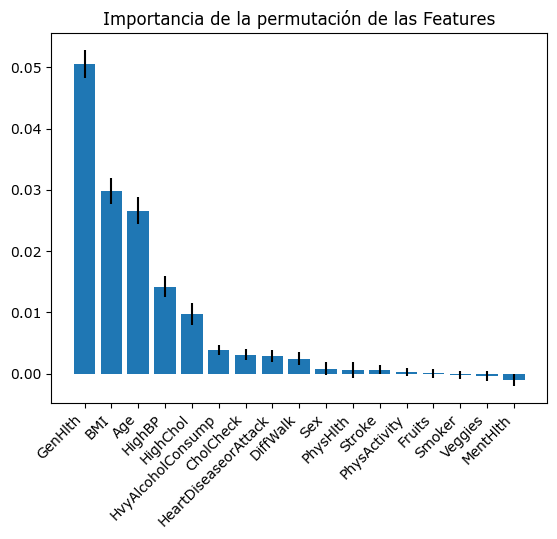

Importancia de las features:
GenHlth: 0.05051983874389988 +/- 0.00229667631997789
BMI: 0.02979465780229629 +/- 0.002063621248323365
Age: 0.026607256524506722 +/- 0.0021727616575339132
HighBP: 0.014201853030624548 +/- 0.0016819793068199723
HighChol: 0.009703656552797268 +/- 0.0017917096296562992
HvyAlcoholConsump: 0.003835726241837049 +/- 0.0007470889651051346
CholCheck: 0.0030553787396563115 +/- 0.0009010142210496695
HeartDiseaseorAttack: 0.0028644175684278054 +/- 0.0010392604233418613
DiffWalk: 0.0024306292288469775 +/- 0.001063796448939318
Sex: 0.000763844684914113 +/- 0.0010473552645422373
PhysHlth: 0.0006271070561331952 +/- 0.0012860706862126458
Stroke: 0.0006200344201617858 +/- 0.000763644558400051
PhysActivity: 0.00023811207770475147 +/- 0.0006364018824723928
Fruits: 3.064808920956545e-05 +/- 0.0007031692634857966
Smoker: -0.00019567626187608767 +/- 0.0006802692844561039
Veggies: -0.0003819223424569899 +/- 0.0007631895302477554
MentHlth: -0.00107268312233297 +/- 0.000974738796295

In [8]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

importances = perm_importance.importances_mean
std_dev = perm_importance.importances_std

indices = np.argsort(importances)[::-1]

plt.bar(range(X_test.shape[1]), importances[indices], yerr=std_dev[indices])
plt.xticks(range(X_test.shape[1]), X_test.columns[indices], rotation=45, ha='right')
plt.title('Importancia de la permutación de las Features')
plt.show()

print("Importancia de las features:")
for i in indices:
    print(f"{X_test.columns[i]}: {importances[i]} +/- {std_dev[i]}")

**Respuesta:** La importancia de las features se mide calculando la diferencia en la métrica de evaluación entre el modelo original y el modelo con las features permutadas. Si la permutación de una feature resulta en una disminución significativa en la métrica, se interpreta que esa feature es importante para el modelo.

Las features con un impacto significativo en la salida del modelo son: *GenHlth*, *BMI*, *Age*, *HighBP*, y *HighChol*, estas tienen sentido puesto que se conoce que las principales causas de las diabetes son la edad, la cantidad de masa corporal, y la genética.

Comparando con las features importantes obtenidas de punto anterior, podemos ver que se mantienen casi todas, excepto por *HighChol*, que para este caso demostró presentar una mayor importancia.

Respecto a las ventajas y desventajas de este método se tiene:

**Ventajas:**
- Este método es agnóstico al modelo subyacente y puede aplicarse a diferentes algoritmos de aprendizaje supervisado.
- La permutación tiene en cuenta interacciones entre features al evaluar su impacto en la métrica de evaluación.
- Es menos sensible a las características específicas de un algoritmo y puede proporcionar una evaluación más robusta de la importancia de las features.

**Desventajas:**
- La permutación implica reajustar el modelo múltiples veces, lo que puede ser computacionalmente costoso, especialmente para modelos complejos o conjuntos de datos grandes.
- La elección de la métrica de evaluación puede afectar las conclusiones sobre la importancia de las features.
- Puede estar sesgado en presencia de clases desbalanceadas, ya que la permutación puede tener un impacto más significativo en modelos entrenados en conjuntos de datos desbalanceados.

## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [9]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [10]:
X_test

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
57608,10.0,0.0,1.0,1.0,53.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,5.0,1.0,0.0,1.0
18474,12.0,0.0,1.0,1.0,31.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0
47268,13.0,0.0,1.0,1.0,18.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0
31419,7.0,0.0,0.0,1.0,21.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
56545,7.0,0.0,1.0,1.0,38.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14537,13.0,1.0,0.0,1.0,33.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
13704,5.0,0.0,1.0,1.0,27.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,30.0,2.0,1.0,0.0,0.0
62461,11.0,1.0,1.0,1.0,40.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,15.0,30.0,1.0,0.0,1.0
70180,10.0,0.0,1.0,1.0,34.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,0.0,10.0,1.0,0.0,1.0


In [21]:
import shap

explainer = shap.TreeExplainer(pipeline.named_steps['classifier'])
new_df=df.drop('Diabetes', axis=1)
new_df.reset_index(drop=True, inplace=True)
df_transformado = preprocessor.transform(new_df)
shap_values = explainer(df_transformado)

shap_values.values[1,:].shape

[23:50:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


(33,)

In [22]:
shap.__version__

'0.43.0'

In [20]:
df_transformado

,StandarScaler__Age,StandarScaler__BMI,StandarScaler__MentHlth,StandarScaler__PhysHlth,OneHotEncoder__Sex_0.0,OneHotEncoder__Sex_1.0,OneHotEncoder__HighChol_0.0,OneHotEncoder__HighChol_1.0,OneHotEncoder__CholCheck_0.0,OneHotEncoder__CholCheck_1.0,...,OneHotEncoder__GenHlth_2.0,OneHotEncoder__GenHlth_3.0,OneHotEncoder__GenHlth_4.0,OneHotEncoder__GenHlth_5.0,OneHotEncoder__DiffWalk_0.0,OneHotEncoder__DiffWalk_1.0,OneHotEncoder__Stroke_0.0,OneHotEncoder__Stroke_1.0,OneHotEncoder__HighBP_0.0,OneHotEncoder__HighBP_1.0
0,-1.607651,-0.541413,0.155748,2.417840,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.197751,-0.541413,-0.459731,-0.575632,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1.548427,-0.541413,-0.459731,0.422192,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.847076,-0.260402,-0.459731,-0.276285,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,-0.204950,-0.119897,-0.459731,-0.575632,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,-0.906300,1.004146,-0.459731,-0.575632,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
70688,0.496401,-0.119897,-0.459731,-0.575632,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
70689,1.548427,-0.681918,1.386706,-0.575632,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
70690,0.847076,-1.665456,-0.459731,-0.575632,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


**Respuesta:** Cada número representa el aporte para detectar la variable target de cada feature, los valores negativos y positivos representan aportes negativos y positivos para la detección del target. 

### 5.2 Aporte local (0.4 puntos)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? 
- ¿Existe algún patrón común entre las instancias analizadas? 
- ¿Es posible generalizar estas conclusiones a todo el dataset?

In [12]:
import matplotlib

matplotlib.rcParams['font.family'] = 'sans-serif'

In [13]:
# Inserte código para generar gráficos de aporte local aquí

idx = 1

shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values.values[idx,:], 
                df_transformado.iloc[idx,:],
                link="logit")

In [14]:
idx = 150

shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values.values[idx,:], 
                df_transformado.iloc[idx,:],
                link="logit")

In [15]:
idx = 9

shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values.values[idx,:], 
                df_transformado.iloc[idx,:],
                link="logit")

Se observa que las variables "OneHotEncoder_highBP"

**Respuesta:**

### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

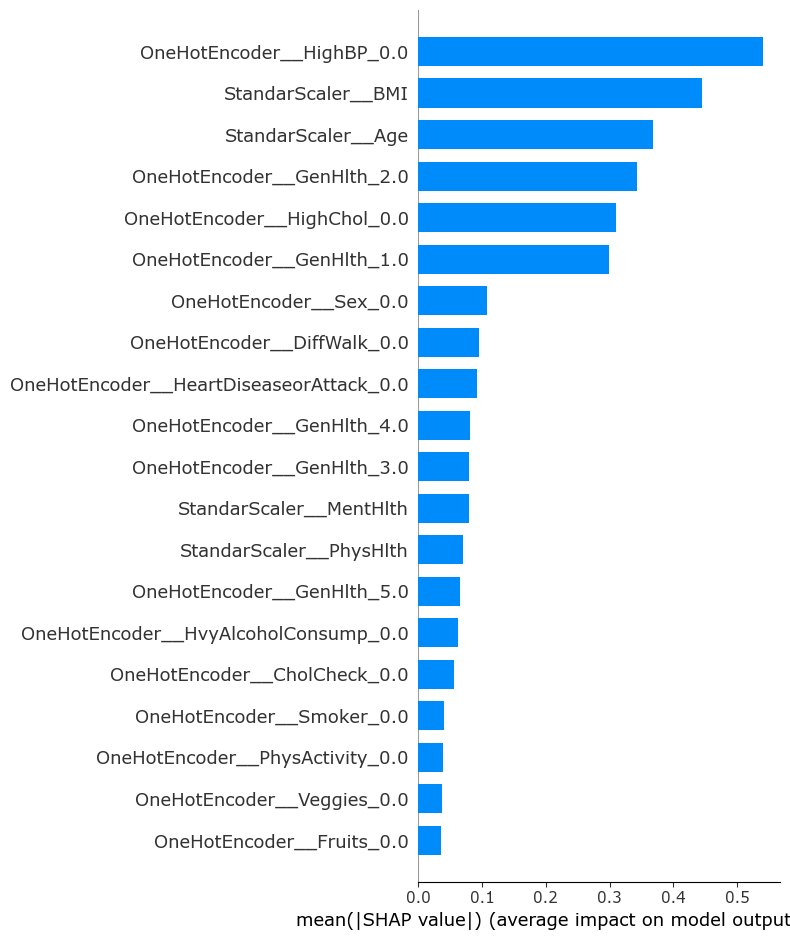

In [16]:
shap.summary_plot(shap_values, df_transformado, plot_type="bar")

Se aprecia en el grafico anterior que las tres variables más relevantes son "Onehotencoder high BP", "StandarScaler_BMI" y "StandardarScaler AGE"

**Respuesta:** 

### 5.4 Scatter plot (0.4 puntos)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [17]:
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = df_transformado.columns[shap_values_abs.argsort()[::-1]]

In [27]:
shap_values[:,"Onehotencoder high BP"]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

OneHotEncoder__HighBP_0.0


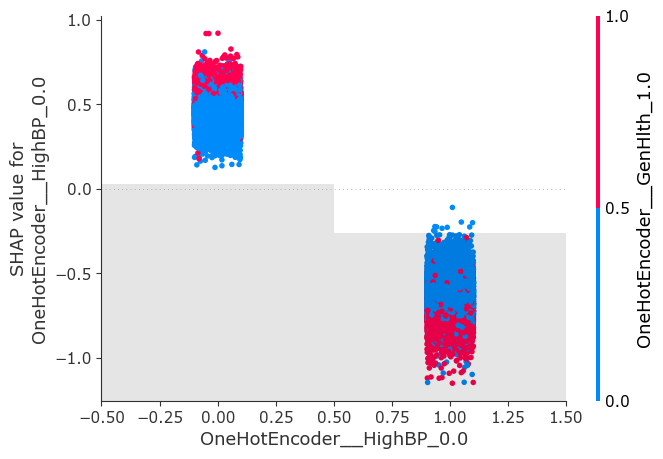

StandarScaler__BMI


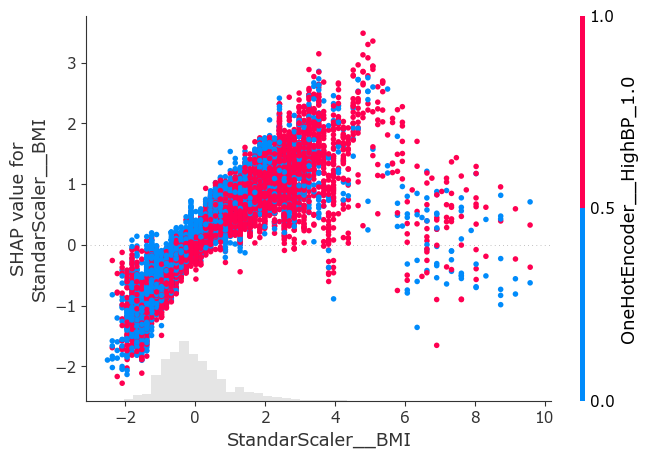

StandarScaler__Age


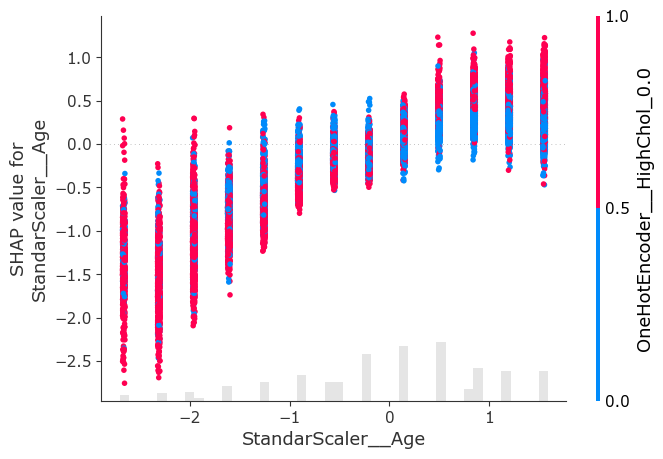

OneHotEncoder__GenHlth_2.0


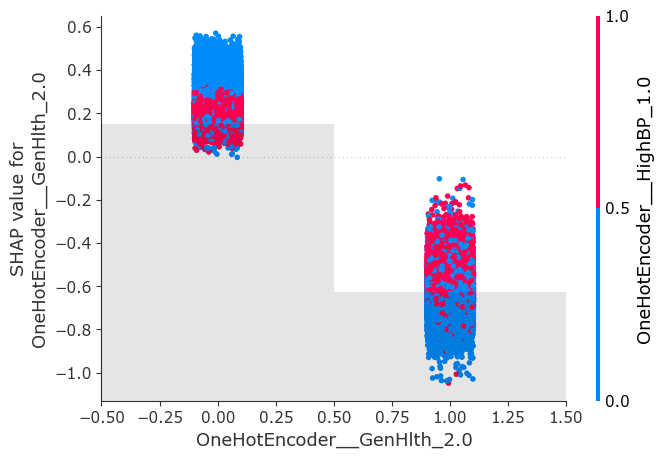

OneHotEncoder__HighChol_0.0


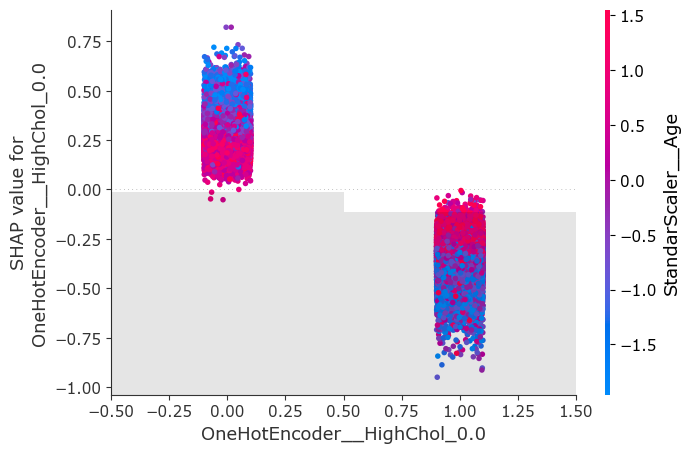

In [18]:
for name in feature_importance_names[:5]:
    print(name)
    #shap.dependence_plot(name, shap_values.values, X)
    shap.plots.scatter(shap_values[:,name], 
                   color=shap_values)

### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [19]:
# Inserte código para generar gráficos PDP aquí

X100 = shap.utils.sample(df_transformado, 100)

sample_ind = 20
shap.partial_dependence_plot(
    'OneHotEncoder__HighChol_0.0', pipeline.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=True,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

KeyError: "None of [Index(['Age', 'BMI', 'MentHlth', 'PhysHlth'], dtype='object')] are in the [columns]"

## 6. Sistema de Reglas! (1.0 puntos)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [ ]:
!pip install alibi

In [ ]:
from alibi.explainers import AnchorTabular

In [ ]:
class_names = ["Persona Sana", "Persona con diabetes"]

In [ ]:
# Inserte su código para generar sistema de reglas aquí


predict_fn = lambda x: pipeline.predict(X_test)
explainer = AnchorTabular(predict_fn, pipeline.feature_names_in_, seed=1)
explainer.fit(df_transformado.to_numpy())

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

In [ ]:
idx = 1000
explanation = explainer.explain(df['Diabetes'].to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

IndexError: index 1 is out of bounds for axis 1 with size 1

# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí


Respecto a que tipo de metodos son más utiles, los metodos locales son más utiles debido a que permiten tomar deciones personalizadas para cada tipo de paciente, adecuandose a sus caracteristicas particulares. Es por esta razón que el mejor metodo SHAP es el mejor para este tipo de problemas, debido a que permite entener el impacto de cada caracteristica en una predicción especifica. 

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>